# Tâche 6 

Déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

# 1) Extraction des données

In [2]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt 

In [3]:
mp_key = "xaEW7gxeGjtHSTeJuWSz9Uf8JpzNlgtg"
mp_id = "mp-9382"

In [4]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
struct = SpacegroupAnalyzer(structure)
conv_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# 2) Détermination des 3 premiers pics du diffractogramme

Les pics de diffraction observés dans un diffractogramme proviennent des interférences constructives des ondes réfléchies par les différents plans cristallins. Pour qu'un pic apparaisse, la condition de Bragg doit être satisfaite: 𝑛$\lambda$= 2𝑑sin$\theta$ où  n est l'ordre de la réflexion, d la distance entre deux plans ( hkl) du réseau direct et $\theta$ l'angle d'incidence.La multiplicité d’un pic correspond au nombre de plans équivalents contribuant à une même famille de plans cristallins (hkl).  Le système étudié étant trigonal, nous utilisons la notation de Bravais-Miller pour désigner les plans, soit (hkil), avec la relation i=−h−k.

Nous analysons ici la maille conventionnelle afin de valider nos résultats à l'aide du logiciel Materials Project.

In [5]:
xrd = XRDCalculator(wavelength=1.54060)
pattern = xrd.get_pattern(conv_structure)

In [6]:
for i in range(3):
    hkl = pattern.hkls[i][0]['hkl']
    multiplicity = pattern.hkls[i][0]['multiplicity']
    angle_2theta = pattern.x[i]
    intensity = pattern.y[i]
    
    print(f"Pic {i+1} :")
    print(f"      → Angle associé {i+1} : 2θ = {angle_2theta:.2f}°")
    print(f"      → Intensité : {intensity:.2f}")
    print(f"      → Indices de Miller (hkil) : {hkl}")
    print(f"      → Multiplicité : {multiplicity}")
    print("\n")


Pic 1 :
      → Angle associé 1 : 2θ = 14.95°
      → Intensité : 1.93
      → Indices de Miller (hkil) : (0, 0, 0, 3)
      → Multiplicité : 2


Pic 2 :
      → Angle associé 2 : 2θ = 30.16°
      → Intensité : 33.88
      → Indices de Miller (hkil) : (0, 0, 0, 6)
      → Multiplicité : 2


Pic 3 :
      → Angle associé 3 : 2θ = 30.97°
      → Intensité : 0.02
      → Indices de Miller (hkil) : (1, 0, -1, 1)
      → Multiplicité : 12




Trois premiers pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54060 Å


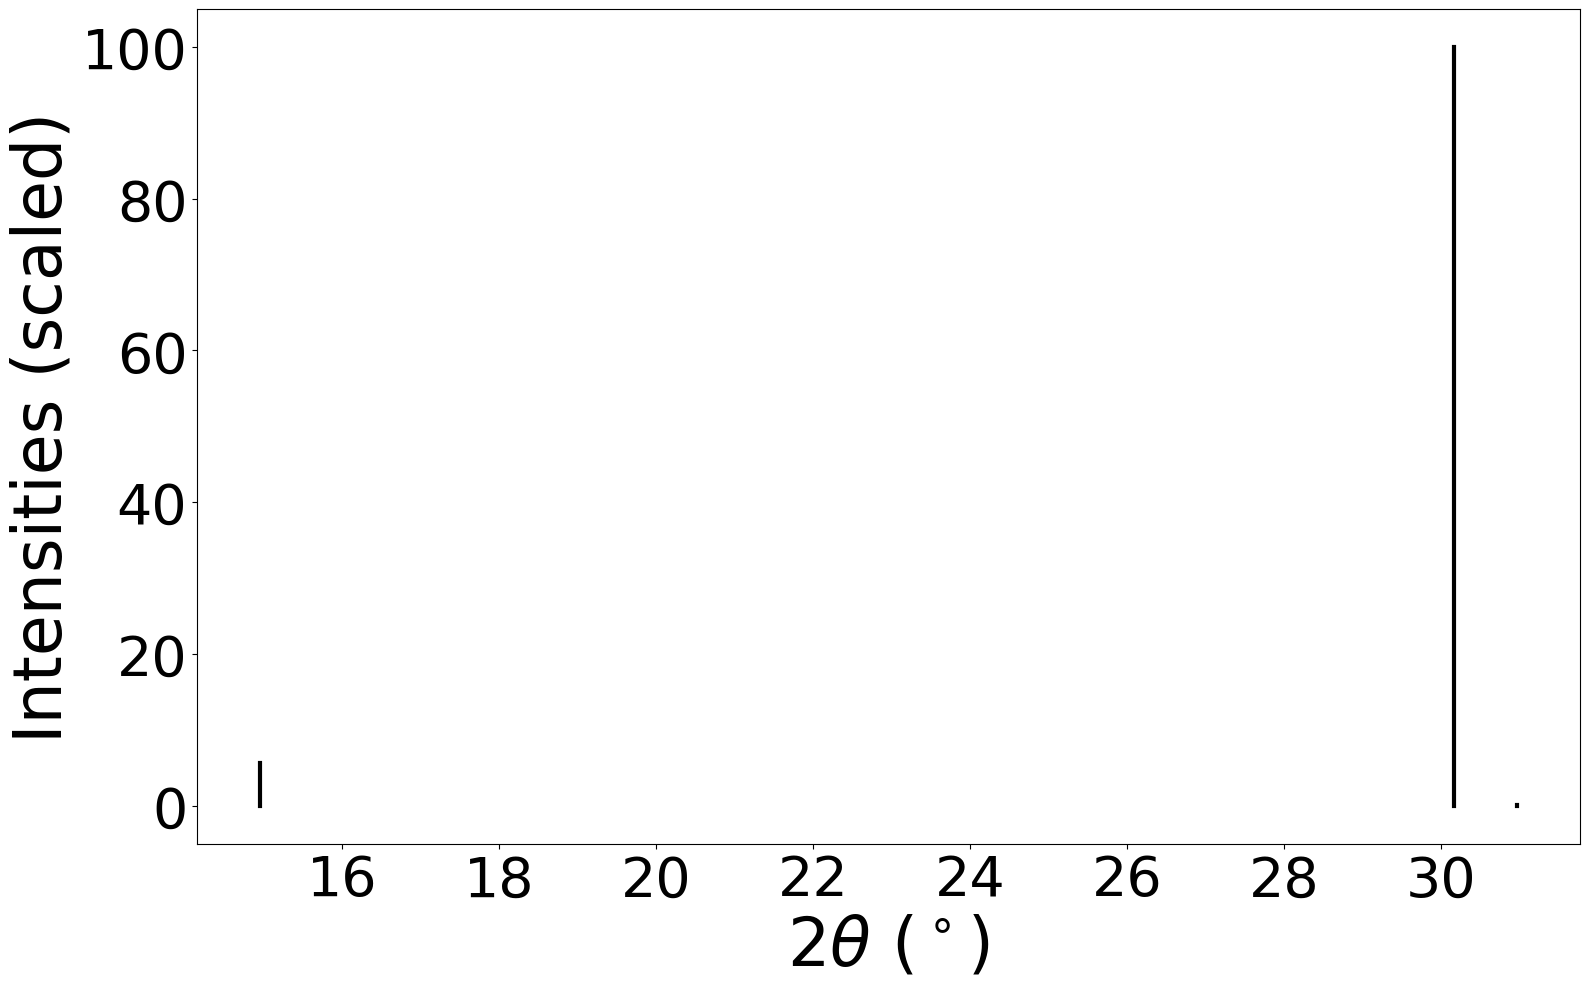

In [7]:
print("Trois premiers pics du diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54060 Å")
fig = xrd.get_plot(conv_structure, two_theta_range=(10, 32), annotate_peaks=True, with_labels=True)
plt.show()


### Analyse des Trois Premiers Pics du Diffractogramme

Le diffractogramme présenté illustre les trois premiers pics issus d’un rayonnement X incident Cu Kα de longueur d’onde \( $\lambda$ = 1.54060 \) Å. Ces pics correspondent aux angles caractéristiques de diffraction \( 2$\theta$ \) et sont associés aux indices de Miller (hkil) ainsi qu’à leur intensité relative.

- **Premier pic** : il se situe à \( 2$\theta$ = 14.95 $^\circ$ \), il est associé aux indices de Miller  (0,0,0,3) avec une intensité de 1.93.
- **Deuxième pic** : il est observé à \( 2$\theta$ = 30.16$^\circ$ \), il correspond aux indices (0,0,0,6) et présente une intensité élevée de 33.88. Il s’agit du pic dominant sur le graphique.
- **Troisième pic** : il est localisé à \( 2$\theta$ = 30.97 $^\circ$ \), il est associé aux indices  (1,0,-1,1) avec une intensité extrêmement faible de 0.02. 

Le graphique met en évidence l’écart important entre l’intensité du deuxième pic et celles des deux autres. Cela suggère que la structure cristalline analysée présente une diffraction plus marquée à \( 2$\theta$ = 30.16$^\circ$ \), tandis que les autres orientations cristallographiques génèrent des signaux plus faibles.
